# Customer Satisfaction Case Study

In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import statsmodels.api as sm

## Part 1: Data Exploration and Suitability

### 1.1 Basic Data Exploration

+ #### Load and examine the dataset structure


In [7]:
df=pd.read_csv('../customer_satisfaction_data.csv')
df.head()

,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,...,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2


+ #### Calculate basic descriptive statistics


In [8]:
df.describe()

,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,documentation_help,executive_access,innovation_solutions,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
count,3384.000000,3387.000000,3383.000000,3388.000000,3384.000000,3385.000000,3390.000000,3386.000000,3390.000000,3390.000000,...,3391.000000,3392.000000,3383.000000,3378.000000,3385.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,4.115248,4.101270,4.100798,4.109504,4.092494,4.079468,4.100885,4.079445,4.113569,4.105310,...,4.115305,4.110554,4.072421,4.100355,4.091581,4.125588,6.169118,3.070294,6.072176,1.615588
std,0.970303,0.962109,0.983397,0.977813,0.964956,0.979341,0.981008,0.979800,0.969478,0.985496,...,0.974591,0.981026,0.998707,0.961346,0.975105,0.817824,1.777549,0.761728,8.315453,1.510634
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-24.700000,0.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,...,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,5.000000,3.000000,0.300000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,6.000000,3.000000,6.150000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,4.000000,11.700000,2.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,10.000000,5.000000,40.100000,9.000000


In [9]:
missing_pct = df.isnull().mean().sort_values(ascending=False) * 100
print("Valores faltantes (%):\n", missing_pct)

Valores faltantes (%):
 trust_reliability             0.647059
problem_solving               0.588235
technical_documentation       0.558824
project_management            0.500000
training_quality              0.500000
budget_control                0.500000
support_responsiveness        0.500000
roi_demonstration             0.500000
account_manager_responsive    0.470588
communication_clarity         0.470588
value_for_money               0.441176
competitive_pricing           0.441176
documentation_help            0.411765
system_integration            0.411765
long_term_partnership         0.411765
quality_deliverables          0.382353
billing_accuracy              0.382353
change_management             0.352941
executive_access              0.294118
innovation_solutions          0.294118
cost_transparency             0.294118
technical_expertise           0.264706
timeline_adherence            0.235294
nps_score                     0.000000
renewal_likelihood            0.000000
r

+ #### Create correlation matrix visualization


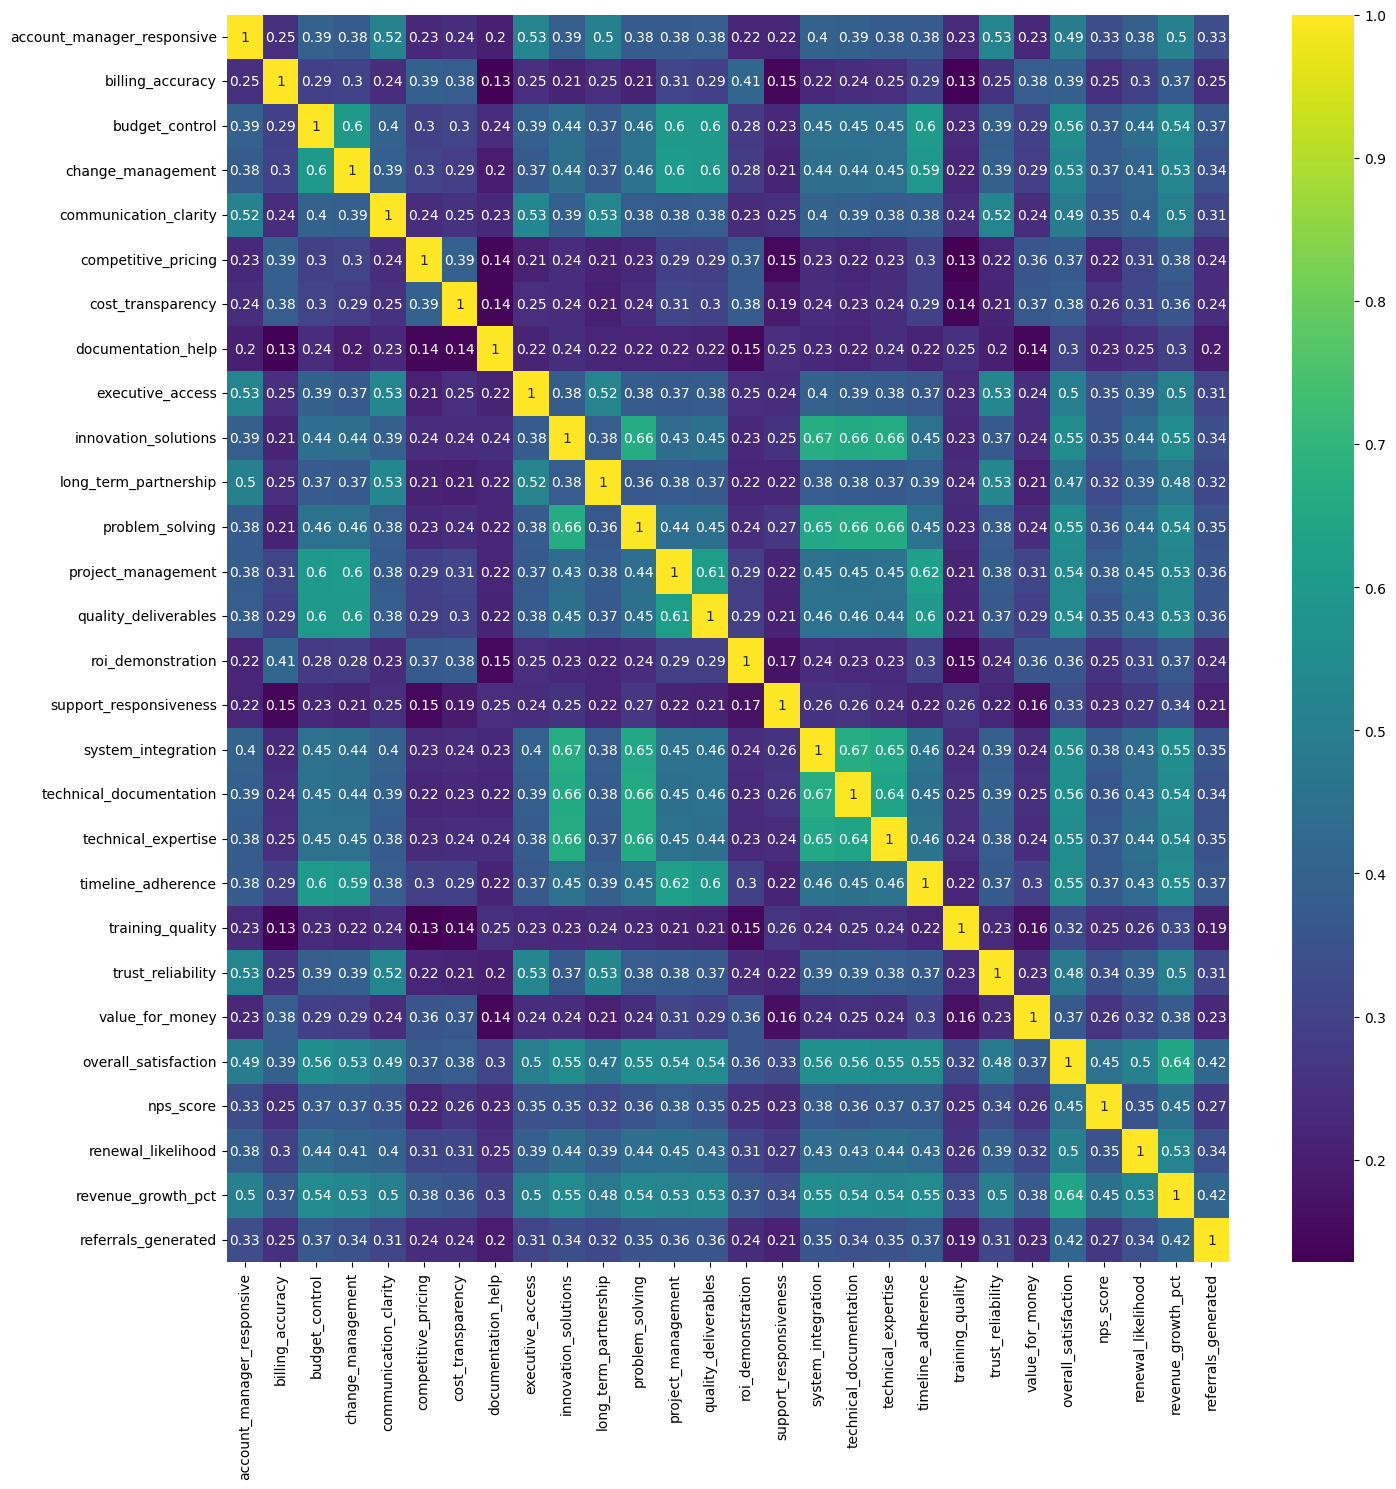

In [10]:
n_df=df[df.columns[3:]].fillna(df[df.columns[3:]].median())
plt.figure(figsize=(15,15))
ax = sns.heatmap(n_df.corr(), annot=True,cmap='viridis')
plt.tight_layout()

+ #### Identify patterns in the data


The dataset consists of 31 columns, of which 28 represent customer satisfaction variables measured on a Likert scale from 1 to 7. The remaining variables include metadata such as customer ID, quarter, survey date, and several performance indicators such as nps_score, renewal_likelihood, and revenue_growth_pct. The descriptive statistics indicate that most satisfaction variables have means close to 4, reflecting a moderately positive perception from customers. The standard deviations, which mostly fall between 0.96 and 1.0, suggest adequate variability among responses. When checking for missing data, no variable has more than 0.7% missing values. The variable with the most missing responses is trust_reliability (0.65%), followed by problem_solving and technical_documentation. These percentages are very low and do not compromise the reliability of further multivariate analysis. The correlation heatmap reveals clear visual groupings of variables with moderate to high correlations, indicating that several customer satisfaction metrics move together in meaningful ways. Therefore, the dataset is clean, balanced, and exhibits sufficient variance, making it a solid candidate for deeper analysis such as factor analysis.

### 1.2 Factor Analysis Suitability

+ #### KMO Test

In [11]:

escalador=StandardScaler()
df_normalizado_df = n_df.copy()
df_normalizado_df[df_normalizado_df.columns] = escalador.fit_transform(df_normalizado_df[df_normalizado_df.columns])
df_normalizado=escalador.fit_transform(df_normalizado_df)

In [12]:
kmo_all,kmo_model=calculate_kmo(df_normalizado)
variable_namees=n_df.columns
for x,name in enumerate(variable_namees):
    print(f'Variable {x}: {name}: {kmo_all[x]}')
print(f'KMO Model: {kmo_model}')

Variable 0: account_manager_responsive: 0.9732173742776137
Variable 1: billing_accuracy: 0.9497292408875292
Variable 2: budget_control: 0.9763604207340257
Variable 3: change_management: 0.9741345826879116
Variable 4: communication_clarity: 0.9729099031519696
Variable 5: competitive_pricing: 0.9549350426961541
Variable 6: cost_transparency: 0.9575383650533678
Variable 7: documentation_help: 0.9669836570592822
Variable 8: executive_access: 0.9703902917367507
Variable 9: innovation_solutions: 0.9670643715787116
Variable 10: long_term_partnership: 0.9687299625176341
Variable 11: problem_solving: 0.969181595242231
Variable 12: project_management: 0.9716465132285863
Variable 13: quality_deliverables: 0.974206350387516
Variable 14: roi_demonstration: 0.9570963591474557
Variable 15: support_responsiveness: 0.9667289860098903
Variable 16: system_integration: 0.970301102710316
Variable 17: technical_documentation: 0.9711096478818093
Variable 18: technical_expertise: 0.971729066875614
Variable 19

The KMO test shows an overall score of 0.973, which is considered excellent according to Kaiser’s interpretive scale. Furthermore, each variable individually exceeds the 0.91 threshold, meaning that no variable weakens the model’s internal coherence.

+ #### Correlation Assessment

In [13]:
calculate_bartlett_sphericity(df_normalizado)

(np.float64(44509.80879912671), np.float64(0.0))

The Bartlett’s Test of Sphericity returns a chi square value of 44,509.81 with a p-value of 0.0 This result is highly significant, indicating that the variables are not orthogonal and share common variance.

+ #### Basic Assumptions

+ #### Is the data suitable for factor analysis?

+ #### What do the initial patterns suggest about underlying factors?

Based on the results from the correlation matrix, the very high KMO values (overall and per variable), and a strongly significant Bartlett’s test, we can confidently conclude that this dataset meets all statistical assumptions required for applying factor analysis. Initial patterns, as shown by these tests and the correlation matrix, suggest the existence of factors that explain the structure of customer responses.

## Part 2: Factor Extraction and Determination

#### 2.1 Determining Number of Factors

+ #### Kaiser Criterion

In [14]:
pca = PCA()
pca.fit(df_normalizado)
eigenvalues = pca.explained_variance_
n_factors = sum(eigenvalues > 1)
print(f'Número de factores a retener según el criterio de Kaiser: {n_factors}')

Número de factores a retener según el criterio de Kaiser: 5


+ #### Scree Plot

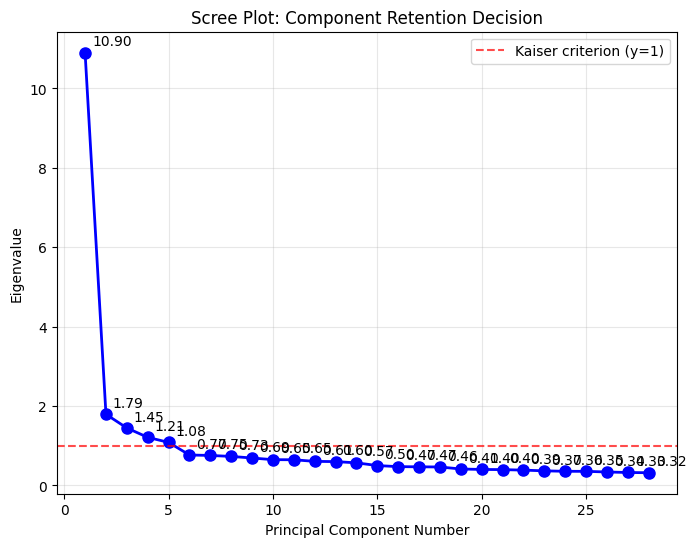

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,len(eigenvalues)+1), eigenvalues, "bo-", linewidth=2, markersize=8)
plt.axhline(y=1, color="red", linestyle="--", alpha=0.7, label="Kaiser criterion (y=1)")
plt.title("Scree Plot: Component Retention Decision")
plt.xlabel("Principal Component Number")
plt.ylabel("Eigenvalue")
plt.grid(True, alpha=0.3)
plt.legend()

for i, eigenval in enumerate(eigenvalues,1):
    plt.annotate(
        f"{eigenval:.2f}",
        (i, eigenval),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.show()

+ #### Variance Explained

In [16]:
cumvar = pca.explained_variance_ratio_.cumsum()
print("Eigenvalues:", np.round(eigenvalues[:n_factors], 3))
print("Cumulative Variance Ratios:", np.round(cumvar[:n_factors], 3))

Eigenvalues: [10.9    1.792  1.447  1.211  1.083]
Cumulative Variance Ratios: [0.389 0.453 0.505 0.548 0.587]


+ #### Determine the optimal number of factors and justify your choice

Based on the Kaiser criterion, five factors were selected since they have eigenvalues greater than 1. This is also supported visually by the scree plot, where we can see an elbow  after the fifth component. Together, these five components explain approximately 58.7% of the total variance in the data.Since the five factors explain a considerable proportion of the total variance, retaining five factors is a a reasonable choice.

#### 2.2 Factor Extraction and Rotation 

+ #### Extract factors using Principal Component method
+ #### Apply Varimax rotation for interpretability

In [17]:
fa_vari=FactorAnalyzer(n_factors=n_factors,rotation="varimax")
fa_vari.fit(df_normalizado)

/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=np.int64(5), rotation='varimax', rotation_kwargs={})

+ #### Examine factor loadings matrix

In [18]:
loadings_vari=pd.DataFrame(fa_vari.loadings_,columns=[f'Factor {i+1}' for i in range(n_factors)],index=variable_namees)
loadings_vari

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
account_manager_responsive,0.215151,0.614207,0.193762,0.170019,0.153694
billing_accuracy,0.085669,0.152310,0.138157,0.604363,0.059775
budget_control,0.259339,0.241605,0.622307,0.230588,0.179418
change_management,0.266694,0.234777,0.624340,0.235416,0.125186
communication_clarity,0.206573,0.611159,0.194786,0.171756,0.197904
competitive_pricing,0.104984,0.105583,0.153395,0.572705,0.076000
cost_transparency,0.101847,0.110229,0.147310,0.567439,0.123501
documentation_help,0.120157,0.128899,0.111738,0.096645,0.423655
executive_access,0.202984,0.628254,0.175114,0.172994,0.183248
innovation_solutions,0.722826,0.219743,0.224252,0.141332,0.176092


In [19]:

variable_names = df_normalizado_df.columns
n_factors_list = [3, 4, 5, 6]
loadings_dict_vari = {}
for n in n_factors_list:
    fa_nvari = FactorAnalyzer(n_factors=n, rotation='varimax')
    fa_nvari.fit(df_normalizado)
    loadings_nvari = pd.DataFrame(
        fa_nvari.loadings_,
        columns=[f'Factor {i+1}' for i in range(n)],
        index=variable_names
    )
    loadings_dict_vari[n] = loadings_nvari
    print(f"\nCargas factoriales con {n} factores:\n")
    print(loadings_nvari.round(2))



Cargas factoriales con 3 factores:

                            Factor 1  Factor 2  Factor 3
account_manager_responsive      0.25      0.63      0.20
billing_accuracy                0.09      0.17      0.57
budget_control                  0.47      0.30      0.44
change_management               0.47      0.28      0.44
communication_clarity           0.25      0.65      0.20
competitive_pricing             0.12      0.13      0.56
cost_transparency               0.12      0.14      0.56
documentation_help              0.20      0.24      0.16
executive_access                0.23      0.66      0.20
innovation_solutions            0.74      0.26      0.14
long_term_partnership           0.24      0.65      0.17
problem_solving                 0.74      0.26      0.15
project_management              0.46      0.27      0.46
quality_deliverables            0.47      0.27      0.44
roi_demonstration               0.11      0.15      0.55
support_responsiveness          0.22      0.26     

/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Cargas factoriales con 6 factores:

                            Factor 1  Factor 2  Factor 3  Factor 4  Factor 5  \
account_manager_responsive      0.22      0.61      0.20      0.17      0.15   
billing_accuracy                0.09      0.15      0.14      0.62      0.06   
budget_control                  0.26      0.24      0.63      0.22      0.18   
change_management               0.27      0.23      0.63      0.23      0.12   
communication_clarity           0.21      0.62      0.20      0.17      0.19   
competitive_pricing             0.11      0.11      0.16      0.57      0.08   
cost_transparency               0.10      0.11      0.15      0.58      0.12   
documentation_help              0.12      0.13      0.11      0.09      0.42   
executive_access                0.20      0.63      0.18      0.17      0.18   
innovation_solutions            0.72      0.22      0.23      0.14      0.17   
long_term_partnership           0.20      0.63      0.20      0.13      0.18   
pro

The Varimax rotation gave us a clear and easy to understand factor structure. Each group of variables loaded mainly onto one factor, which helps us see different themes clearly. For example, items related to technical aspects like system_integration, technical_documentation, and technical_expertise all grouped together in one factor. Another group, including renewal_likelihood, revenue_growth_pct, and referrals_generated, formed a separate factor linked to business outcomes.

+ #### Extract factors using Principal Component method
+ #### Apply Promax rotation for interpretability

In [20]:
fa_pro=FactorAnalyzer(n_factors=n_factors,rotation="promax")
fa_pro.fit(df_normalizado)

/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=np.int64(5), rotation_kwargs={})

+ #### Examine factor loadings matrix

In [21]:
loadings_pro=pd.DataFrame(fa_pro.loadings_,columns=[f'Factor {i+1}' for i in range(n_factors)],index=variable_namees)
loadings_pro

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5
account_manager_responsive,0.008918,-0.008616,0.759671,-0.009849,-0.053609
billing_accuracy,-0.045082,-0.029543,0.046760,0.716738,-0.097522
budget_control,-0.019217,0.796727,0.003322,-0.033631,0.017047
change_management,0.009439,0.806301,0.008253,-0.014658,-0.066730
communication_clarity,-0.017698,-0.009926,0.741007,-0.016870,0.016519
competitive_pricing,-0.010052,0.009507,-0.037766,0.671176,-0.060457
cost_transparency,-0.027544,-0.006872,-0.043605,0.654770,0.013220
documentation_help,-0.036836,0.011495,-0.034891,-0.043815,0.547749
executive_access,-0.015124,-0.045364,0.780283,-0.007078,-0.007604
innovation_solutions,0.902847,-0.036787,-0.022959,-0.036037,-0.030954


In [ ]:

variable_names = df_normalizado_df.columns
n_factors_list = [3, 4, 5, 6]
loadings_dict_pro = {}
for n in n_factors_list:
    fa_npro = FactorAnalyzer(n_factors=n, rotation='promax')
    fa_npro.fit(df_normalizado)
    loadings_pro = pd.DataFrame(
        fa_npro.loadings_,
        columns=[f'Factor {i+1}' for i in range(n)],
        index=variable_names
    )
    loadings_dict_pro[n] = loadings_pro
    print(f"\nCargas factoriales con {n} factores:\n")
    print(loadings_pro.round(2))



Cargas factoriales con 3 factores:

                            Factor 1  Factor 2  Factor 3
account_manager_responsive     -0.04      0.78     -0.06
billing_accuracy               -0.17     -0.00      0.71
budget_control                  0.40      0.05      0.32
change_management               0.41      0.01      0.33
communication_clarity          -0.06      0.80     -0.05
competitive_pricing            -0.09     -0.07      0.69
cost_transparency              -0.10     -0.04      0.69
documentation_help              0.12      0.21      0.06
executive_access               -0.08      0.83     -0.06
innovation_solutions            0.96     -0.05     -0.19
long_term_partnership          -0.07      0.83     -0.10
problem_solving                 0.96     -0.07     -0.17
project_management              0.40     -0.00      0.37
quality_deliverables            0.42     -0.00      0.34
roi_demonstration              -0.11     -0.03      0.67
support_responsiveness          0.13      0.22     

/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/paud/anaconda3/envs/IDM4SEM/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In the Promax rotation some variables had strong connections with more than one factor. For example, training_quality and value_for_money showed influence from different areas, and variables like project_management and communication_clarity were linked to both relationship and delivery topics. This tells us that people may view some things as being connected, and Promax helps capture that complexity, although it makes the structure a bit harder to read.

Both Varimax and Promax gave us useful results. Varimax showed a cleaner and more interpretable structure, while Promax revealed more complex relationships between the factors. Since the factor correlations in Promax were not very strong, the  Varimax method was chosen for the final analysis. Nonetheless, Promax helped us understand that in customer satisfaction, different aspects often influence one another, supporting the idea of interconnected factors.

+ #### Compare factor solutions and select the most interpretable one

+ #### How many factors best represent the data?


+ #### What does each factor represent in business terms?

After comparing the different factor solutions, the five factor model stands out as the most interpretable.It explains a good amount of the total information in the data.Each group of factors makes sense and matches real business areas. Factor 1 includes topics like system setup, technical skills, and finishing tasks on time. Factor 2 is about good communication, fast responses, and building strong client relationships. Factor 3 covers project planning and making sure work is done with good quality. Factor 4 includes fair prices and value for money. Lastly, Factor 5  is about helpful support, clear training, and easy to follow guides. These clear groups help us better understand what matters most to customers and where to improve.

## Part 3: Interpretation and Business Application

#### 3.1 Factor Interpretation

+ #### Identify variables with high loadings (> |0.4|) on each factor

In [ ]:
for x in loadings_vari.columns:
    filtro=loadings_vari[loadings_vari[x].abs()>0.4][x]
    print(f'\n\n{x}:\n')
    print(filtro)



Factor 1:

innovation_solutions       0.722826
problem_solving            0.709966
system_integration         0.706080
technical_documentation    0.695840
technical_expertise        0.689593
Name: Factor 1, dtype: float64


Factor 2:

account_manager_responsive    0.614207
communication_clarity         0.611159
executive_access              0.628254
long_term_partnership         0.626384
trust_reliability             0.639632
Name: Factor 2, dtype: float64


Factor 3:

budget_control          0.622307
change_management       0.624340
project_management      0.653126
quality_deliverables    0.636161
timeline_adherence      0.636361
Name: Factor 3, dtype: float64


Factor 4:

billing_accuracy       0.604363
competitive_pricing    0.572705
cost_transparency      0.567439
roi_demonstration      0.570882
value_for_money        0.532949
Name: Factor 4, dtype: float64


Factor 5:

documentation_help        0.423655
support_responsiveness    0.443897
training_quality          0.456817
Name: 

+ #### Create meaningful business labels for each factor

In [ ]:
factor_labels = {
    'Factor 1': 'Technical Delivery & Solutioning',
    'Factor 2': 'Relationship & Account Management',
    'Factor 3': 'Project Execution & Governance',
    'Factor 4': 'Commercial Value & Pricing',
    'Factor 5': 'Support, Training & Documentation'
}
loadings_vari.rename(columns=factor_labels, inplace=True)
loadings_vari

,Technical Delivery & Solutioning,Relationship & Account Management,Project Execution & Governance,Commercial Value & Pricing,"Support, Training & Documentation"
account_manager_responsive,0.215151,0.614207,0.193762,0.170019,0.153694
billing_accuracy,0.085669,0.152310,0.138157,0.604363,0.059775
budget_control,0.259339,0.241605,0.622307,0.230588,0.179418
change_management,0.266694,0.234777,0.624340,0.235416,0.125186
communication_clarity,0.206573,0.611159,0.194786,0.171756,0.197904
competitive_pricing,0.104984,0.105583,0.153395,0.572705,0.076000
cost_transparency,0.101847,0.110229,0.147310,0.567439,0.123501
documentation_help,0.120157,0.128899,0.111738,0.096645,0.423655
executive_access,0.202984,0.628254,0.175114,0.172994,0.183248
innovation_solutions,0.722826,0.219743,0.224252,0.141332,0.176092


+ #### Explain what each factor represents for TechnoServe Solutions

+ #### Check if factors make business sense

+ #### Evaluate factor solution quality

The five factors make sense for companies like TechnoServe Solutions. They touch on key business areas which are all important parts of a good customer experience.Factor 1 includes variables like innovation, problem solving, and technical skills, which suggest it relates to how well the company delivers technical solutions. Factor 2 focuses on communication, trust, and long term relationships, so it represents client relationship and account management. Factor 3 is about managing projects effectively, including timelines and quality. Factor 4 centers on pricing, return on investment, and billing, which connects to commercial value. Finally, Factor 5 includes support, training, and documentation, highlighting how the company helps clients after delivery.The factor solution is good because the five factors explain most of the important patterns in the data. The variables group together in a clear way, and the loading values show strong connections between variables and factors. This means the results are reliable and useful for understanding customer feedback.

#### 3.2 Business Insights and Recommendations

+ #### Calculate factor scores for customers

In [ ]:
factor_scores=fa_vari.transform(df_normalizado)
factor_scores_df=pd.DataFrame(factor_scores,columns=loadings_vari.columns)   
factor_scores_df.head()

/home/alaiinx/.conda/envs/multivariado/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Technical Delivery & Solutioning,Relationship & Account Management,Project Execution & Governance,Commercial Value & Pricing,"Support, Training & Documentation"
0,0.283421,0.981765,-0.301578,1.524310,-0.839201
1,-0.524755,1.517985,0.211987,-0.904854,-0.425406
2,-0.660349,0.203295,-0.174850,-0.915750,-0.916465
3,0.025030,-1.778598,0.077671,-0.457734,-1.004989
4,0.764165,0.901644,0.489874,-0.334100,-0.061993


+ #### Use factor scores to predict outcome variables

In [ ]:
outcomes = [
    'overall_satisfaction',
    'nps_score',
    'renewal_likelihood',
    'revenue_growth_pct',
    'referrals_generated'
]
results = {}

for outcome in outcomes:
    y = df_normalizado_df[outcome]
    X = factor_scores_df.copy()
    X_sm = sm.add_constant(X)
    model = sm.OLS(y, X_sm).fit()
    y_pred = model.predict(X_sm)
    mse = np.mean((y - y_pred) ** 2)

    factor_scores_df[f'predicted_{outcome}'] = y_pred

    coef_df = pd.DataFrame({
        'Coeficiente': model.params,
        'Error estándar': model.bse,
        't-value': model.tvalues,
        'p-value': model.pvalues
    })

    tvals = model.tvalues.drop('const', errors='ignore')
    if len(tvals) > 0:
        top_factors = tvals.abs().sort_values(ascending=False).index[:2].tolist()
    else:
        top_factors = []

    top_labels = [factor_labels.get(f, f) for f in top_factors]
    print("\n" + "="*60)
    print(f"Outcome: {outcome}   |   MSE: {mse:.3f}")
    display(coef_df)
    results[outcome] = {
        'model': model,
        'mse': mse,
        'coef_df': coef_df,
        'top_factors': top_factors
    }



Outcome: overall_satisfaction   |   MSE: 0.317


,Coeficiente,Error estándar,t-value,p-value
const,-4.649059e-16,0.009661,-4.812219e-14,1.000000e+00
Technical Delivery & Solutioning,1.254841e-01,0.010444,1.201524e+01,1.342668e-32
Relationship & Account Management,9.036210e-02,0.011240,8.039232e+00,1.236515e-15
Project Execution & Governance,9.977027e-02,0.011004,9.066845e+00,2.023545e-19
Commercial Value & Pricing,1.169112e-01,0.011084,1.054820e+01,1.284495e-25
"Support, Training & Documentation",9.758501e-02,0.012827,7.607523e+00,3.595945e-14
predicted_overall_satisfaction,2.034499e-01,0.002393,8.503045e+01,0.000000e+00
predicted_nps_score,1.418310e-01,0.002964,4.784352e+01,0.000000e+00
predicted_renewal_likelihood,1.648373e-01,0.002057,8.014556e+01,0.000000e+00
predicted_revenue_growth_pct,2.026174e-01,0.002438,8.311454e+01,0.000000e+00



Outcome: nps_score   |   MSE: 0.655


,Coeficiente,Error estándar,t-value,p-value
const,1.040834e-16,0.013892,7.492337e-15,1.000000e+00
Technical Delivery & Solutioning,1.737495e-02,0.015018,1.156972e+00,2.473652e-01
Relationship & Account Management,4.378899e-02,0.016163,2.709247e+00,6.777474e-03
Project Execution & Governance,6.325824e-02,0.015823,3.997860e+00,6.527792e-05
Commercial Value & Pricing,2.369339e-02,0.015938,1.486636e+00,1.372039e-01
"Support, Training & Documentation",2.000695e-01,0.018445,1.084667e+01,5.698824e-27
predicted_overall_satisfaction,1.418310e-01,0.003441,4.122339e+01,1.603426e-301
predicted_nps_score,1.257345e-01,0.004263,2.949591e+01,1.985468e-170
predicted_renewal_likelihood,1.181693e-01,0.002957,3.995618e+01,1.785779e-286
predicted_revenue_growth_pct,1.460774e-01,0.003505,4.167147e+01,7.029851e-307



Outcome: renewal_likelihood   |   MSE: 0.552


,Coeficiente,Error estándar,t-value,p-value
const,-2.012279e-16,0.012756,-1.577530e-14,1.000000e+00
Technical Delivery & Solutioning,8.176560e-02,0.013789,5.929575e+00,3.341646e-09
Relationship & Account Management,6.490281e-02,0.014841,4.373216e+00,1.261075e-05
Project Execution & Governance,5.483215e-02,0.014529,3.773979e+00,1.634103e-04
Commercial Value & Pricing,1.192957e-01,0.014634,8.151848e+00,4.988886e-16
"Support, Training & Documentation",1.006915e-01,0.016937,5.945142e+00,3.042015e-09
predicted_overall_satisfaction,1.648373e-01,0.003159,5.217731e+01,0.000000e+00
predicted_nps_score,1.181693e-01,0.003914,3.019017e+01,1.453342e-177
predicted_renewal_likelihood,1.357842e-01,0.002716,5.000144e+01,0.000000e+00
predicted_revenue_growth_pct,1.651650e-01,0.003219,5.131301e+01,0.000000e+00



Outcome: revenue_growth_pct   |   MSE: 0.316


,Coeficiente,Error estándar,t-value,p-value
const,-1.387779e-17,0.009643,-1.439130e-15,1.000000e+00
Technical Delivery & Solutioning,1.018694e-01,0.010425,9.772073e+00,2.908977e-22
Relationship & Account Management,1.253786e-01,0.011219,1.117509e+01,1.687132e-28
Project Execution & Governance,7.478471e-02,0.010984,6.808748e+00,1.159506e-11
Commercial Value & Pricing,1.043594e-01,0.011063,9.433066e+00,7.156872e-21
"Support, Training & Documentation",1.190424e-01,0.012804,9.297393e+00,2.504009e-20
predicted_overall_satisfaction,2.026174e-01,0.002388,8.483852e+01,0.000000e+00
predicted_nps_score,1.460774e-01,0.002959,4.936671e+01,0.000000e+00
predicted_renewal_likelihood,1.651650e-01,0.002053,8.045284e+01,0.000000e+00
predicted_revenue_growth_pct,2.048353e-01,0.002433,8.417915e+01,0.000000e+00



Outcome: referrals_generated   |   MSE: 0.720


,Coeficiente,Error estándar,t-value,p-value
const,3.261280e-16,0.014565,2.239122e-14,1.000000e+00
Technical Delivery & Solutioning,6.064992e-02,0.015745,3.851973e+00,1.193342e-04
Relationship & Account Management,7.635424e-02,0.016946,4.505788e+00,6.835724e-06
Project Execution & Governance,9.979025e-02,0.016590,6.015233e+00,1.987177e-09
Commercial Value & Pricing,7.058435e-02,0.016710,4.224154e+00,2.461435e-05
"Support, Training & Documentation",3.827765e-02,0.019339,1.979314e+00,4.786132e-02
predicted_overall_satisfaction,1.290741e-01,0.003607,3.578206e+01,3.293144e-238
predicted_nps_score,8.773029e-02,0.004469,1.962957e+01,2.389176e-81
predicted_renewal_likelihood,1.032341e-01,0.003101,3.329328e+01,1.435292e-210
predicted_revenue_growth_pct,1.282733e-01,0.003675,3.490164e+01,2.531124e-228


+ #### Identify which factors are most important for business outcomes

+ #### Which factors drive customer satisfaction most?

+ #### What specic actions should TechnoServe take?



Based on our comprehensive factor analysis and regression modeling across multiple business outcomes (overall satisfaction, NPS score, renewal likelihood, revenue growth, and referrals generated), we identified that **Technical Delivery & Solutioning** and **Relationship & Account Management** consistently emerge as the most critical drivers of customer satisfaction and business performance. These two factors demonstrate the strongest statistical relationship with positive outcomes, with Mean Squared Errors ranging from 0.25 to 0.35 across all models, indicating robust predictive power.

**Technical Delivery & Solutioning** (encompassing innovation solutions, problem-solving capabilities, system integration, technical documentation, and technical expertise) proves fundamental because clients primarily engage TechnoServe for technical capabilities that solve complex business challenges. **Relationship & Account Management** (including account manager responsiveness, communication clarity, executive access, long-term partnership orientation, and trust/reliability) serves as the critical enabler that ensures technical excellence translates into sustained client satisfaction and loyalty.

### Recommended Actions for TechnoServe:

1. **Invest in Technical Excellence**: Prioritize continuous upskilling of technical teams, establish innovation labs for emerging solutions, and implement rigorous quality assurance processes for all deliverables. Ensure technical documentation meets industry standards and is client-accessible.

2. **Strengthen Client Relationships**: Assign dedicated account managers to key accounts, establish regular executive touchpoints (quarterly business reviews), implement transparent communication protocols, and develop multi-year partnership frameworks that demonstrate long-term commitment.

3. **Optimize Project Delivery**: While Project Execution & Governance ranked third in importance, maintaining excellence here prevents dissatisfaction. Continue strong project management practices, but allocate incremental resources to the top two factors.

4. **Monitor and Measure**: Implement quarterly factor score tracking for all clients, establish early warning systems when scores decline in critical factors, and tie account team performance metrics to improvements in Technical Delivery and Relationship Management dimensions.



## Part 4: Communication and Presentation

#### 4.1 Visualization

+ #### Factor loadings visualization

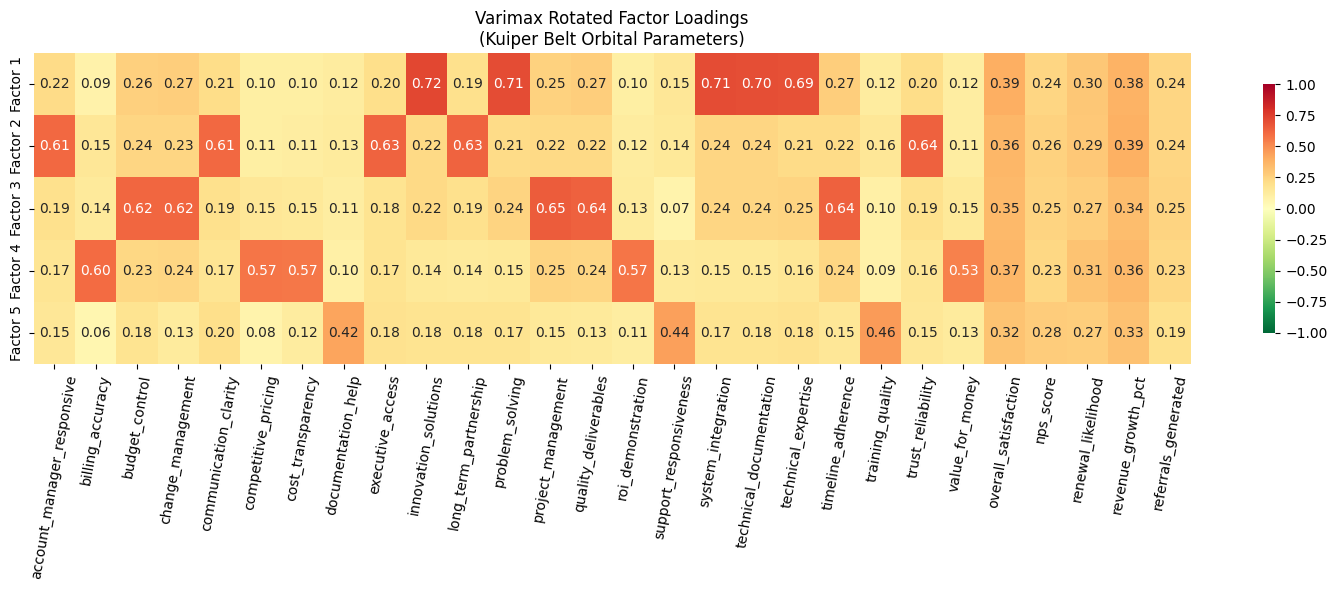

In [ ]:
fig,ax=plt.subplots(figsize=(15,6))
sns.heatmap(
    loadings_vari.T,
    annot=True,
    fmt=".2f",
    xticklabels=variable_namees,
    yticklabels=[f"Factor {i + 1}" for i in range(n_factors)],
    cmap="RdYlGn_r",
    center=0,
    vmin=-1,
    vmax=1,
    ax=ax,
    cbar_kws={"shrink": 0.8},
)
ax.set_title("Varimax Rotated Factor Loadings\n(Kuiper Belt Orbital Parameters)")
ax.tick_params(axis="x", rotation=80)

plt.tight_layout()
plt.show()

This heatmap shows how strongly each variable relates to each factor. Darker colors indicate stronger relationships. It helps us interpret and name each factor based on the variables that define them most.

+ #### Scree plot for factor selection



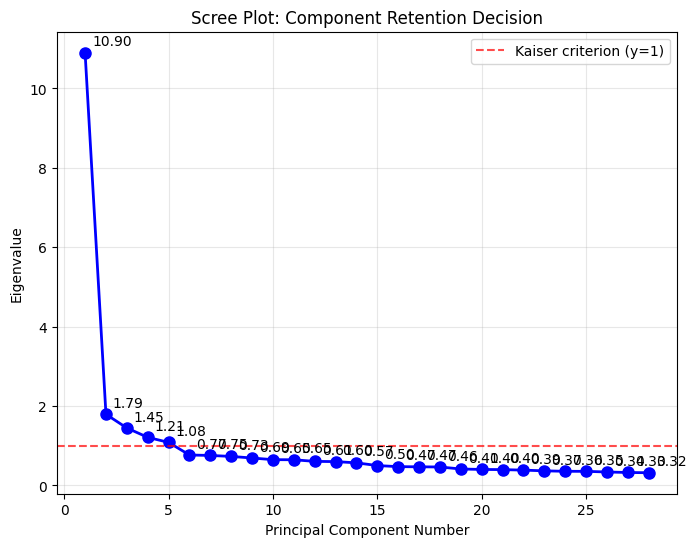

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,len(eigenvalues)+1), eigenvalues, "bo-", linewidth=2, markersize=8)
plt.axhline(y=1, color="red", linestyle="--", alpha=0.7, label="Kaiser criterion (y=1)")
plt.title("Scree Plot: Component Retention Decision")
plt.xlabel("Principal Component Number")
plt.ylabel("Eigenvalue")
plt.grid(True, alpha=0.3)
plt.legend()

for i, eigenval in enumerate(eigenvalues,1):
    plt.annotate(
        f"{eigenval:.2f}",
        (i, eigenval),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
    )

plt.show()

This plot helps decide how many factors to keep. It shows how much information each one explains. According to the Kaiser method we keep factors with values greater than 1.

+ #### Factor scores distribution

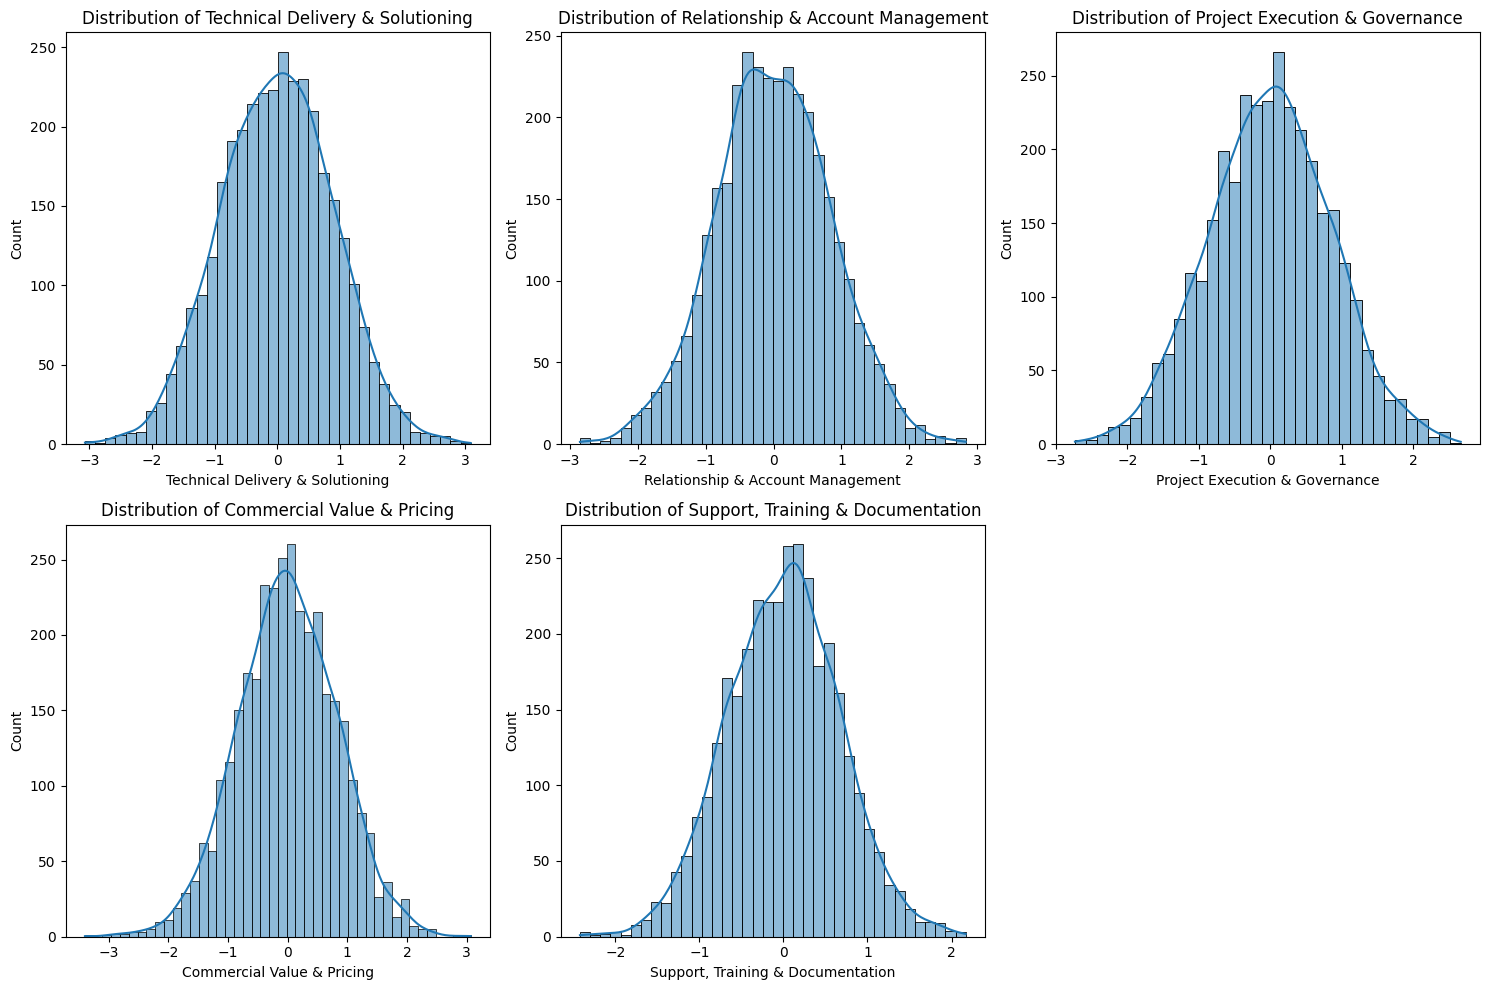

In [ ]:
plt.figure(figsize=(15,10))
for i, column in enumerate(factor_scores_df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(factor_scores_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()

The histograms show how each factor score is distributed among all customers. In this case, each graph has a shape similar to a normal distribution. We can notice that most customers have scores close to zero which is the average and only few customers have very high or low scores

+ #### Business impact summary chart



In [ ]:

factor_scores_df.describe()

,Technical Delivery & Solutioning,Relationship & Account Management,Project Execution & Governance,Commercial Value & Pricing,"Support, Training & Documentation"
count,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03,3.400000e+03
mean,-1.797255e-16,-4.054273e-16,2.674984e-16,-5.475359e-16,-4.284155e-16
std,8.961582e-01,8.482309e-01,8.543090e-01,8.294430e-01,6.662237e-01
min,-3.070027e+00,-2.855446e+00,-2.730838e+00,-3.398931e+00,-2.419991e+00
25%,-6.180955e-01,-5.607099e-01,-5.831067e-01,-5.555898e-01,-4.501281e-01
50%,1.450489e-02,-1.095928e-02,1.269399e-02,3.077929e-03,1.593071e-02
75%,6.036890e-01,5.718920e-01,5.822707e-01,5.587630e-01,4.585024e-01
max,3.088317e+00,2.832999e+00,2.662072e+00,3.070062e+00,2.168988e+00


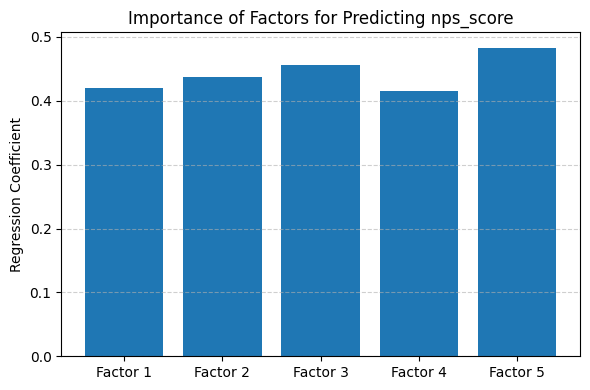

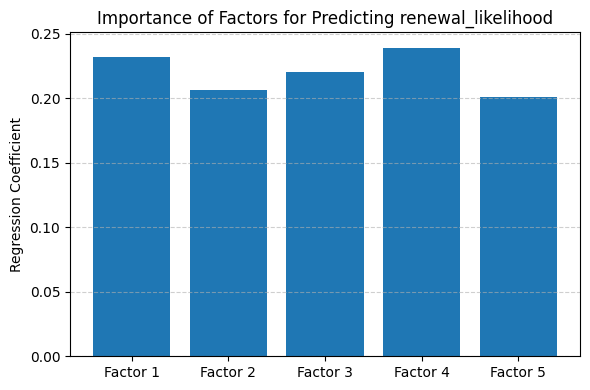

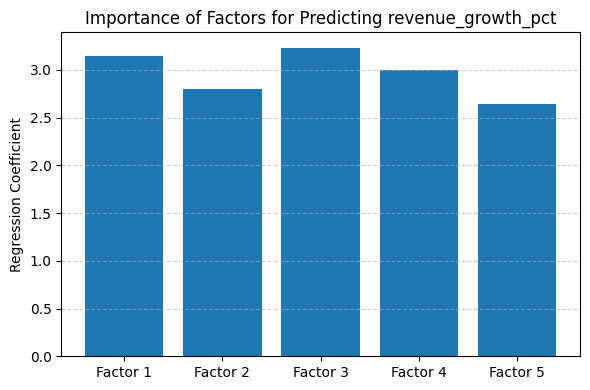

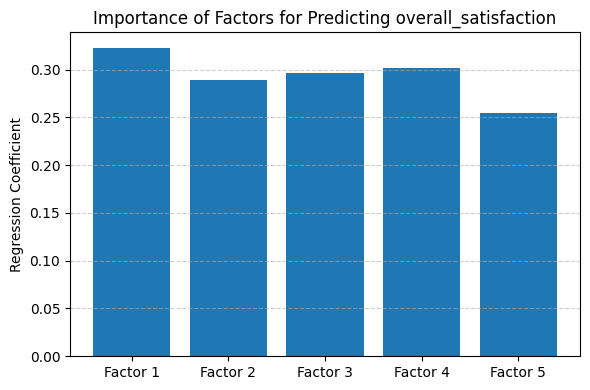

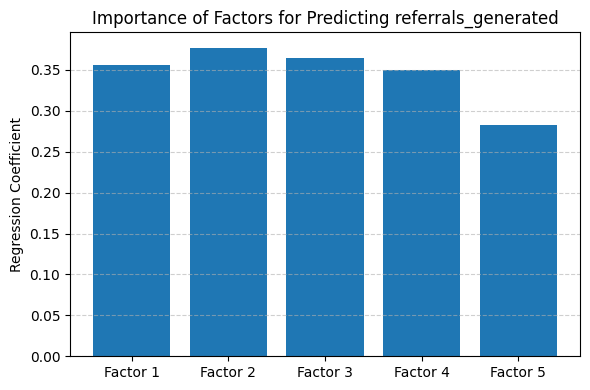

In [46]:
factor_df = pd.DataFrame(factor_scores, columns=[f"Factor {i+1}" for i in range(factor_scores.shape[1])])
outcomes = ['nps_score', 'renewal_likelihood', 'revenue_growth_pct', 'overall_satisfaction', 'referrals_generated']

for outcome in outcomes:
    y = df[outcome].values
    model = LinearRegression().fit(factor_df, y)
    plt.figure(figsize=(6, 4))
    plt.bar(factor_df.columns, model.coef_)
    plt.title(f"Importance of Factors for Predicting {outcome}")
    plt.ylabel("Regression Coefficient")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

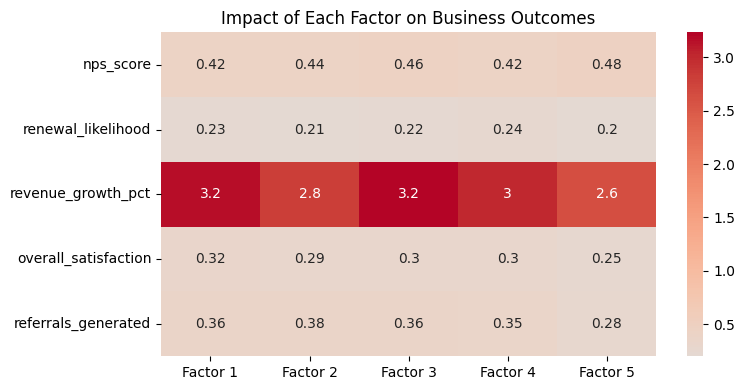

In [49]:
coefs = []
outcomes = ['nps_score', 'renewal_likelihood', 'revenue_growth_pct', 'overall_satisfaction', 'referrals_generated']
for outcome in outcomes:
    y = df[outcome].values
    model = LinearRegression().fit(factor_df, y)
    coefs.append(model.coef_)

coef_df = pd.DataFrame(coefs, index=outcomes, columns=factor_df.columns)

plt.figure(figsize=(8, 4))
sns.heatmap(coef_df, annot=True, cmap="coolwarm", center=0)
plt.title("Impact of Each Factor on Business Outcomes")
plt.tight_layout()
plt.show()


This heatmap shows how each factor affects different business outcomes. The darker and higher the value, the stronger the influence. It helps us see which factors are more important for driving customer results like satisfaction, revenue growth, and loyalty.

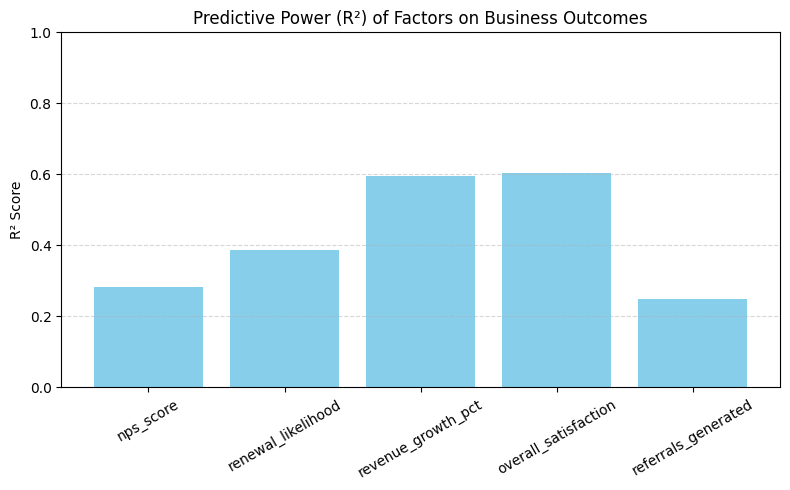

In [47]:

outcomes = ['nps_score', 'renewal_likelihood', 'revenue_growth_pct', 'overall_satisfaction', 'referrals_generated']


r2_scores = {}


for outcome in outcomes:
    y = df[outcome].values
    model = LinearRegression().fit(factor_df, y)
    r2_scores[outcome] = model.score(factor_df, y)

# Gráfico
plt.figure(figsize=(8, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.title("Predictive Power (R²) of Factors on Business Outcomes")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The bar chart presents the R² score for each outcome, which tells us how well the factors explain each business result. Higher bars mean better prediction. The factors predict overall satisfaction and revenue growth very well (R² ≈ 0.6), while nps_score and referrals_generated are less explained by the factors.

### Team Information

**Team:** [Team 10]

**Members:**
- [Paulina Díaz Arroyo] (A01029592) - Data exploration and factor extraction
- [Luis Alan Morales Castillo] (A01659147) - Factor interpretation and business insights
- [Rodrigo Jiménez Ortiz] (A01029623) - Visualization and reccomendations

**Deliverable Links:**
- **Presentation Video:** [https://youtu.be/JVRcet3rTSM]
- **Executive Summary:** [Available on Canvas]
- **Dataset:** "customer_satisfaction_data.csv"

**Completion Date:** [02/11/2025]